In [1]:
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.neighbors
import pandas as pd
import numpy as np

## 1.1 What Is Machine Learning?
Machine Learning is the science (and art) of programming computers so they can learn from data.

> **A more engineering-oriented definition**
> A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.
>   — Tom Mitchell, 1997

For example, spam filter is a Machine Learning program that can learn to flag spam given examples of spam emails and examples of regular (nonspam, also called “ham”) emails. The examples that the system uses to learn are called the `training set`. Each training example is called a `training instance` (or `sample`). In this case, the task $T$ is to flag spam for new emails, the experience $E$ is the training data, and the performance measure $P$ needs to be defined; for example, you can use the ratio of correctly classified emails. This particular performance measure is called accuracy and it is often used in classification tasks.

## 1.2 Why Use Machine Learning?
Consider how you would write a spam filter using traditional programming techniques (`Figure 1-1`):
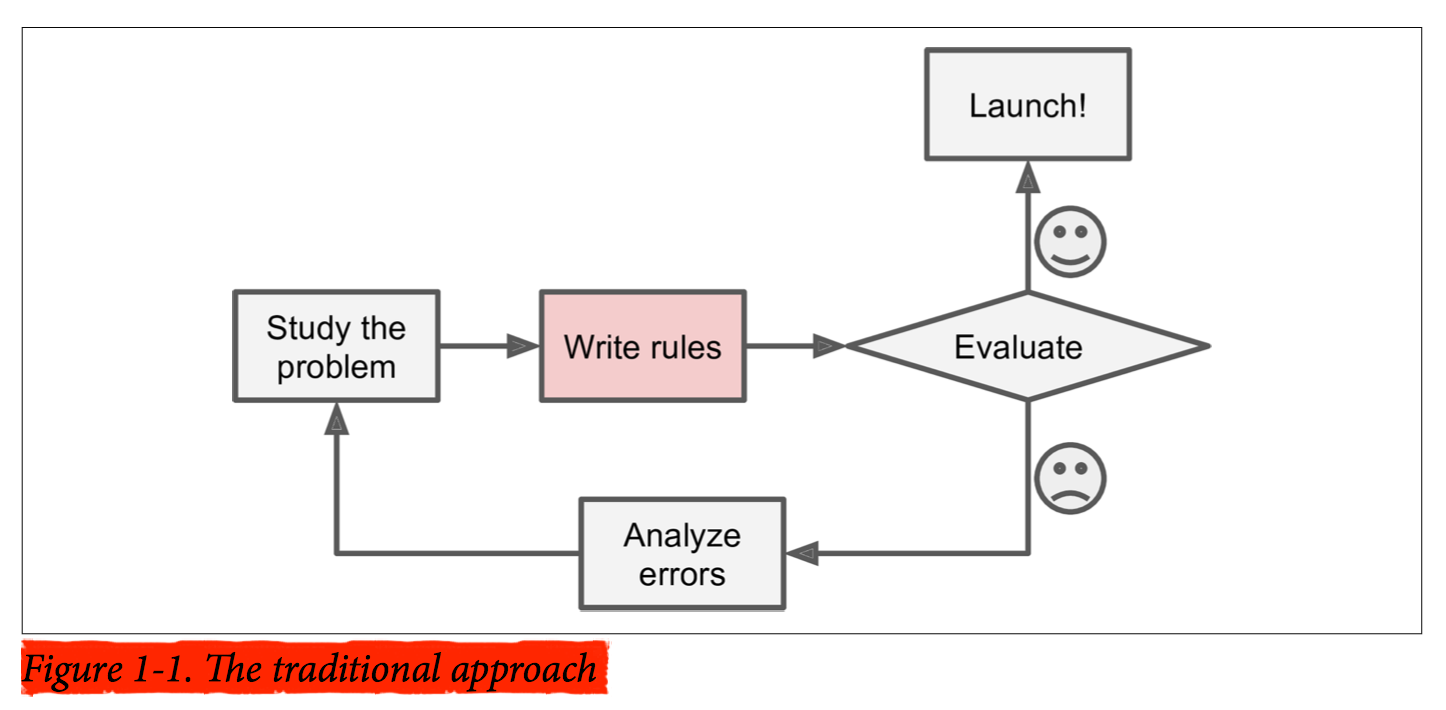

Since the problem is not trivial, your program will likely become a long list of complex rules—pretty hard to maintain.

In contrast, a spam filter based on Machine Learning techniques automatically learns which words and phrases are good predictors of spam by detecting unusually frequent patterns of words in the spam examples compared to the ham examples (`Figure 1-2`). The program is much shorter, easier to maintain, and most likely more accurate.
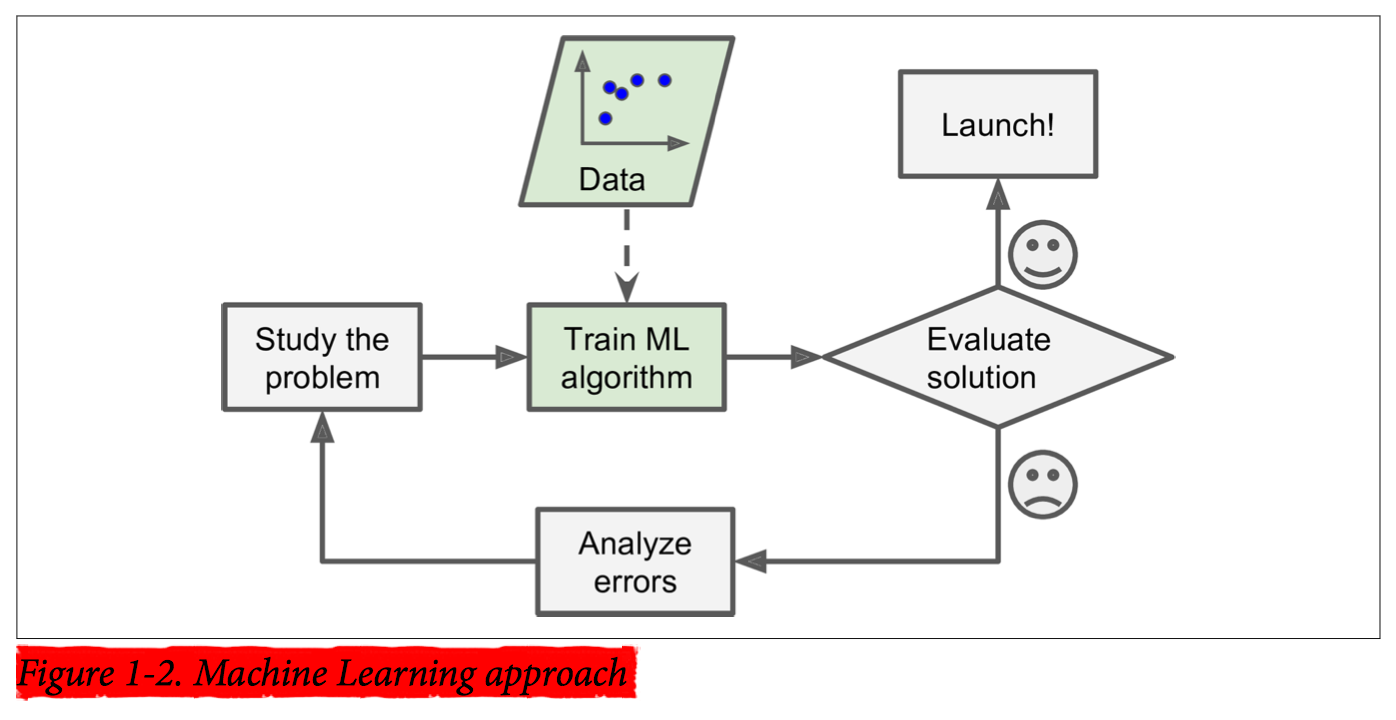

Moreover, if spammers notice that all their emails containing “4U” are blocked, they might start writing “For U” instead. A spam filter using traditional programming techniques would need to be updated to flag “For U” emails. If spammers keep working around your spam filter, you will need to keep writing new rules forever.

In contrast, a spam filter based on Machine Learning techniques automatically notices that “For U” has become unusually frequent in spam flagged by users, and it starts flagging them without your intervention (`Figure 1-3`).
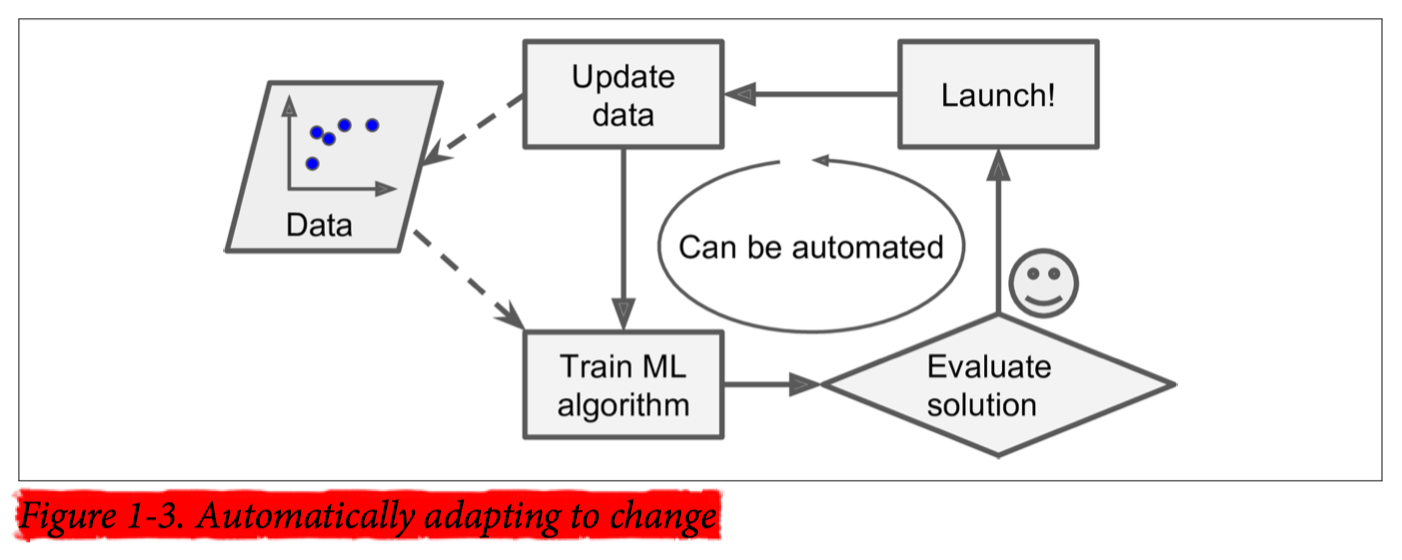

Another area where Machine Learning shines is for problems that either are too complex for traditional approaches or have no known algorithm, such as speech recognition.

Finally, Machine Learning can help humans learn (`Figure 1-4`): ML algorithms can be inspected to see what they have learned. For instance, once the spam filter has been trained on enough spam, it can easily be inspected to reveal the list of words and combinations of words that it believes are the best predictors of spam. Sometimes this will reveal unsuspected correlations or new trends, and thereby lead to a better understanding of the problem.

Applying ML techniques to dig into large amounts of data can help discover patterns that were not immediately apparent. This is called data mining.
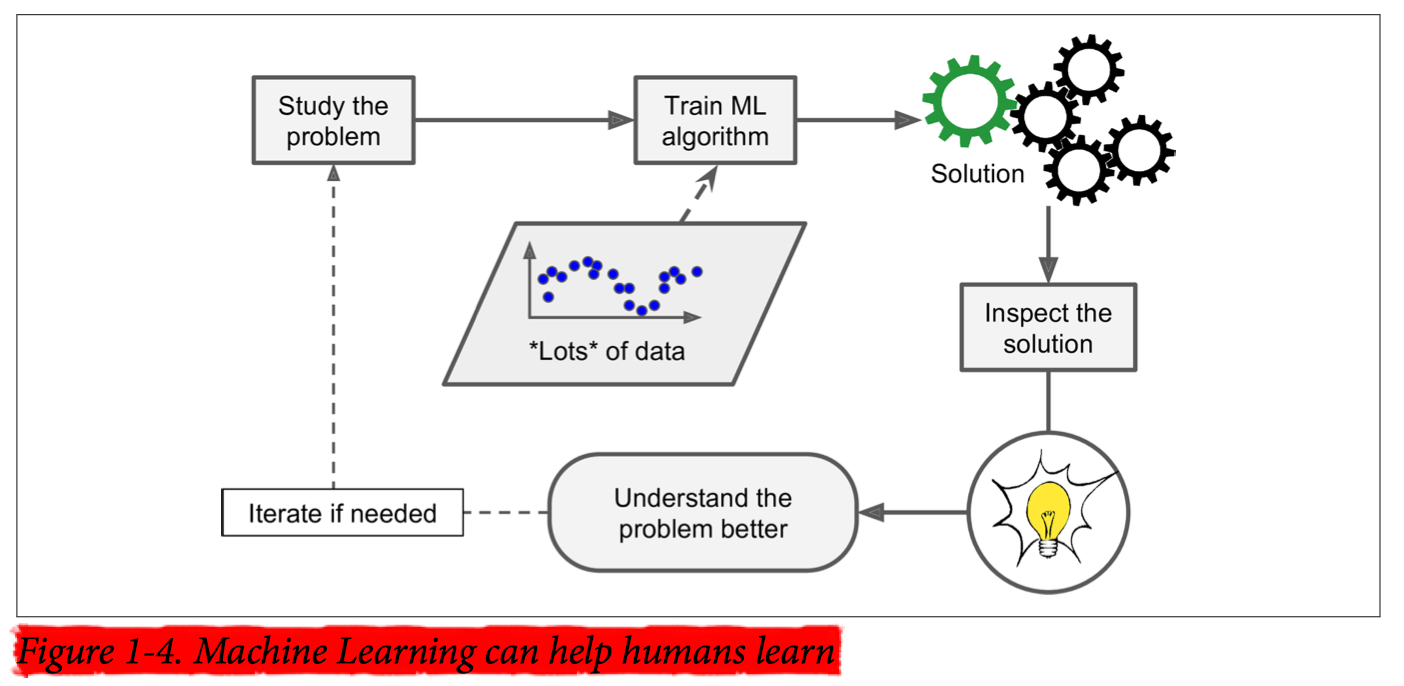

To summarize, Machine Learning is great for:
- Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
- Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
- Fluctuating environments: a Machine Learning system can adapt to new data.
- Getting insights about complex problems and large amounts of data.

## 1.3 Types of Machine Learning Systems
There are so many different types of Machine Learning systems that it is useful to classify them in broad categories based on:
- Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)
- Whether or not they can learn incrementally on the fly (online versus batch learning)
- Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)

### 1.3.1 Supervised/Unsupervised Learning
Machine Learning systems can be classified according to the amount and type of supervision they get during training. There are four major categories:
- supervised learning
- unsupervised learning
- semisupervised learning
- reinforcement Learning

#### 1.3.1.1 Supervised learning
In supervised learning, the training data you feed to the algorithm includes the desired solutions, called labels (`Figure 1-5`):
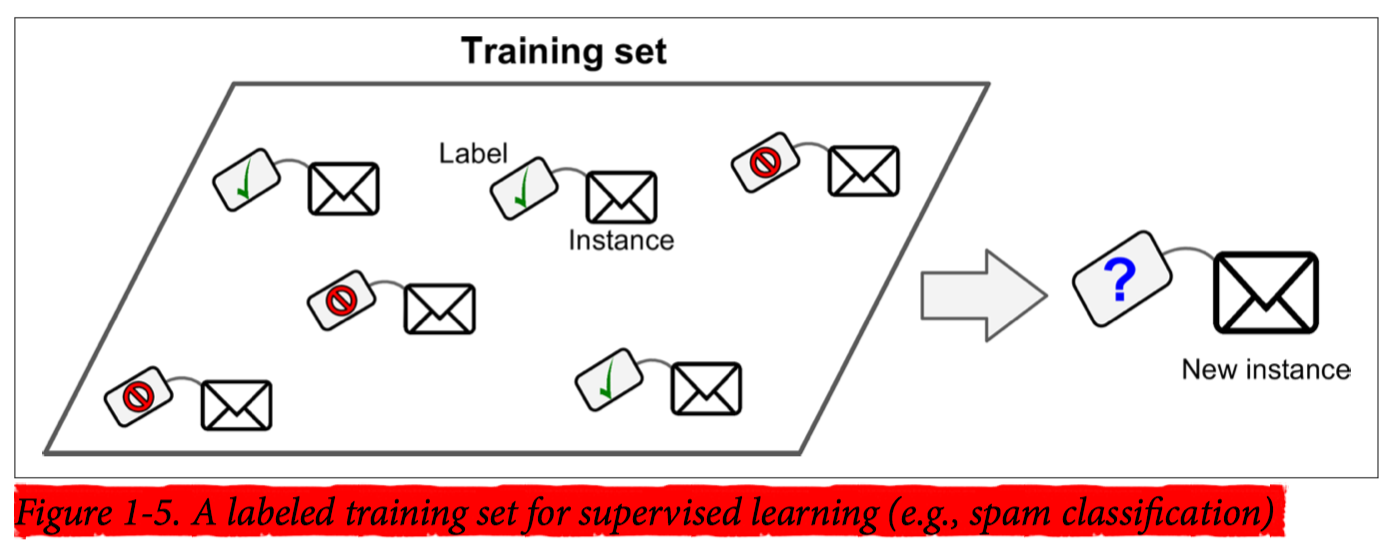

A typical supervised learning task is `classification`. The spam filter is a good example of this: it is trained with many example emails along with their labels, and it must learn how to classify new emails.

Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called `regression` (`Figure 1-6`):
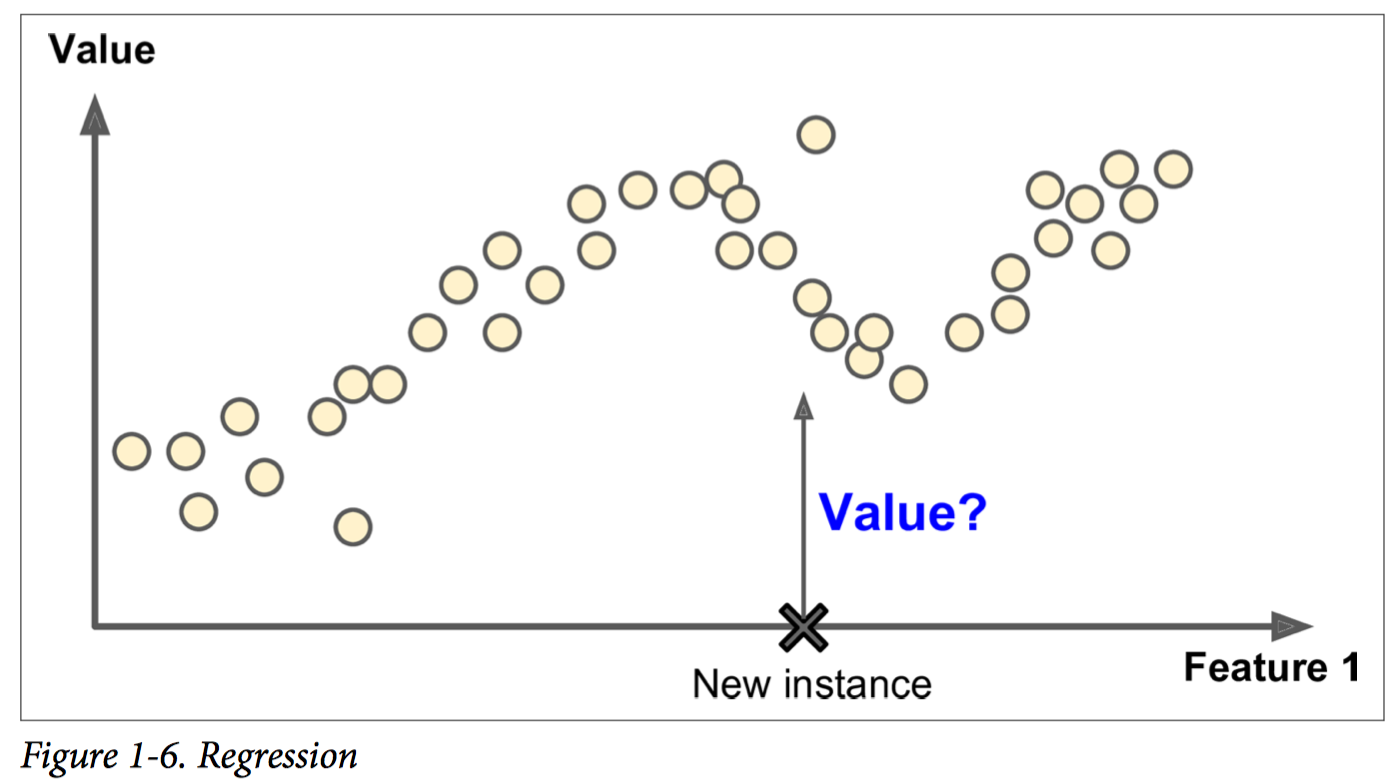

Here are some of the most important supervised learning algorithms (covered in this book):
- k-Nearest Neighbors
- Linear Regression
- Logistic Regression
- Support Vector Machines (SVMs)
- Decision Trees and Random Forests
- Neural networks

#### 1.3.1.2 Unsupervised learning
In unsupervised learning, the training data is unlabeled (`Figure 1-7`). The system tries to learn without a teacher:
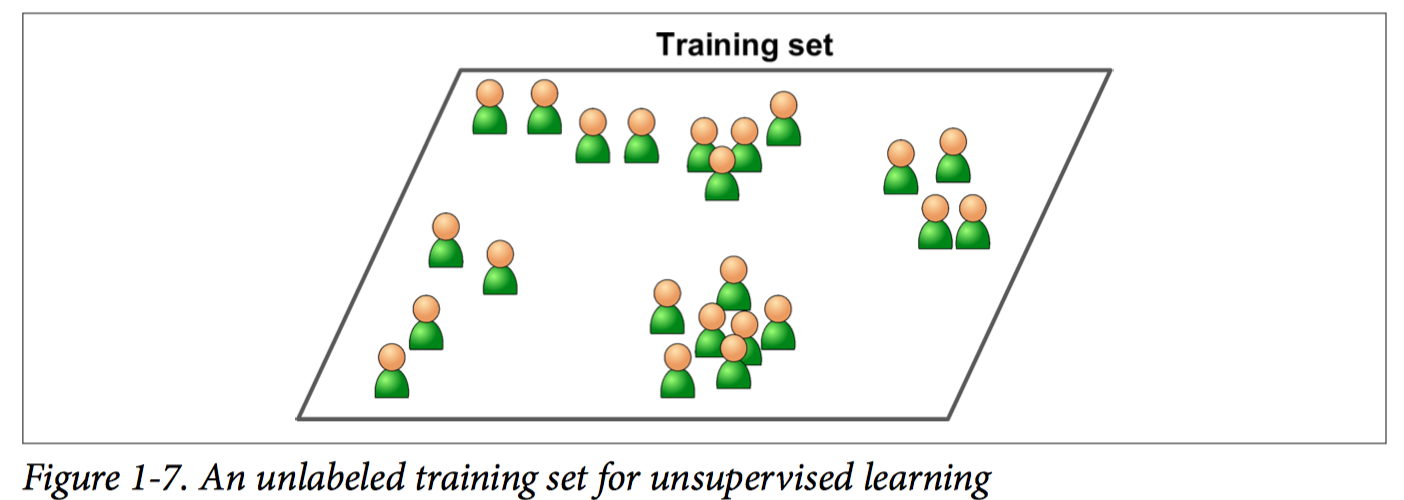

Here are some of the most important unsupervised learning algorithms (we will cover dimensionality reduction in Chapter 8):
- Clustering
    + k-Means
    + Hierarchical Cluster Analysis (HCA)
    + Expectation Maximization
- Visualization and dimensionality reduction
    + Principal Component Analysis (PCA)
    + Kernel PCA
    + Locally-Linear Embedding (LLE)
    + t-distributed Stochastic Neighbor Embedding (t-SNE)
- Association rule learning
    + Apriori
    + Eclat

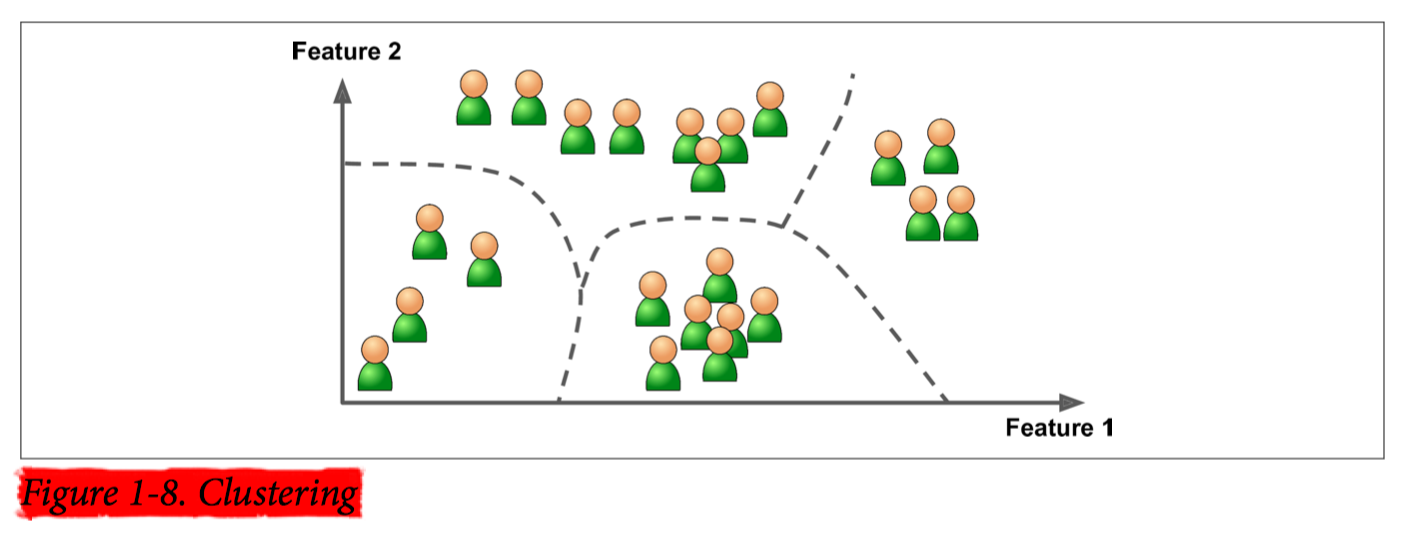

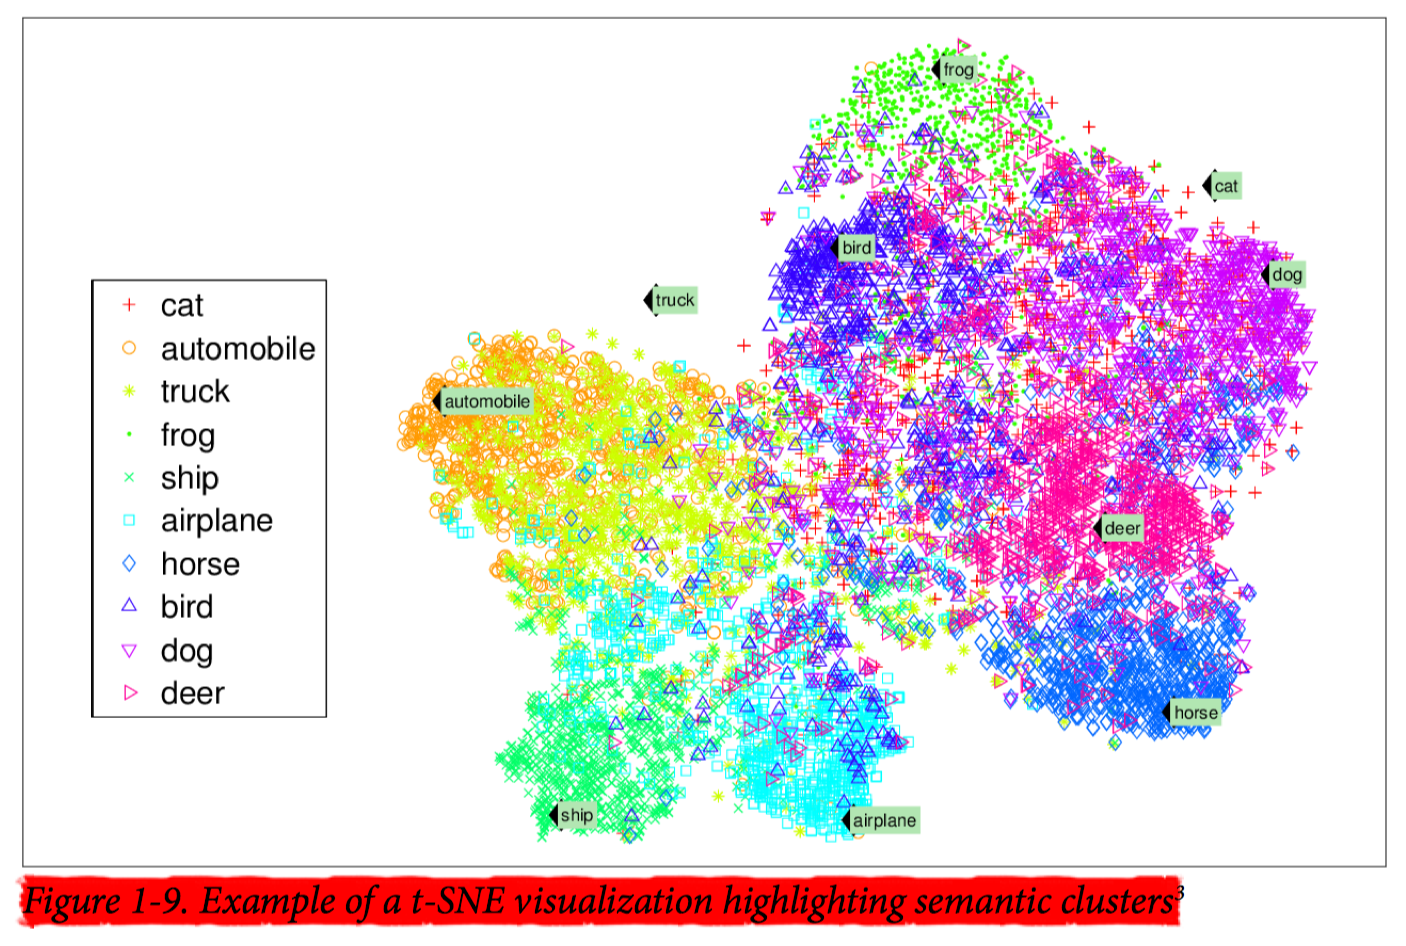

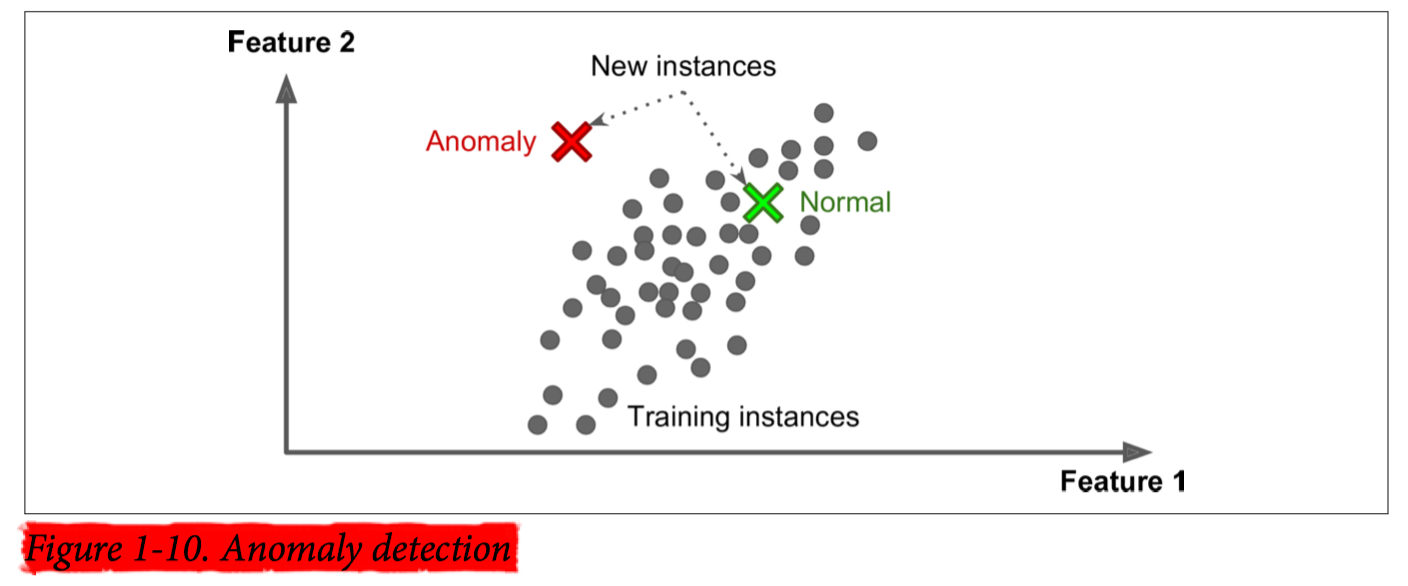

#### 1.3.1.3 Semisupervised learning
Some algorithms can deal with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data. This is called `semisupervised learning`.

Some photo-hosting services, such as Google Photos, are good examples of this. Once you upload all your family photos to the service, it automatically recognizes that the same person A shows up in photos 1, 5, and 11, while another person B shows up in photos 2, 5, and 7. This is the unsupervised part of the algorithm (clustering). Now all the system needs is for you to tell it who these people are. Just one label per person, and it is able to name everyone in every photo, which is useful for searching photos.

#### 1.3.1.4 Reinforcement Learning
Reinforcement Learning is a very different beast. The learning system, called an agent in this context, can observe the environment, select and perform actions, and get rewards in return (or penalties in the form of negative rewards, as in `Figure 1-12`). It must then learn by itself what is the best strategy, called a policy, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation.

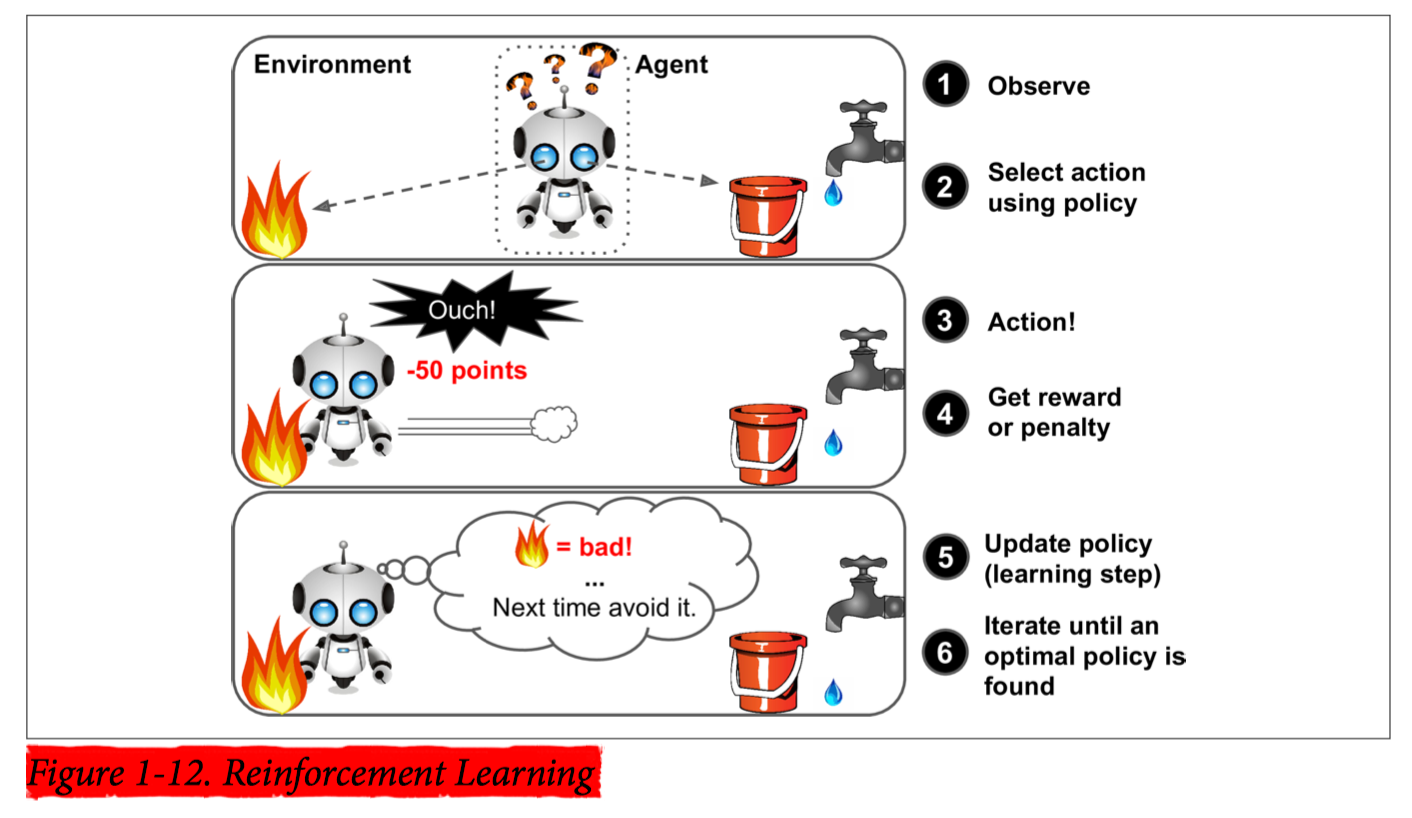

### 1.3.2 Batch and Online Learning
Another criterion used to classify Machine Learning systems is whether or not the system can learn incrementally from a stream of incoming data.

#### 1.3.2.1 Batch learning
In batch learning, the system is incapable of learning incrementally: it must be trained using all the available data. This will generally take a lot of time and computing resources, so it is typically done offline. First the system is trained, and then it is launched into production and runs without learning anymore; it just applies what it has learned. This is called `offline learning`.

If you want a batch learning system to know about new data, you need to train a new version of the system from scratch on the full dataset (not just the new data, but also the old data), then stop the old system and replace it with the new one.

#### 1.3.2.2 Online learning
In online learning, you train the system incrementally by feeding it data instances sequentially, either individually or by small groups called mini-batches. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives (see `Figure 1-13`).
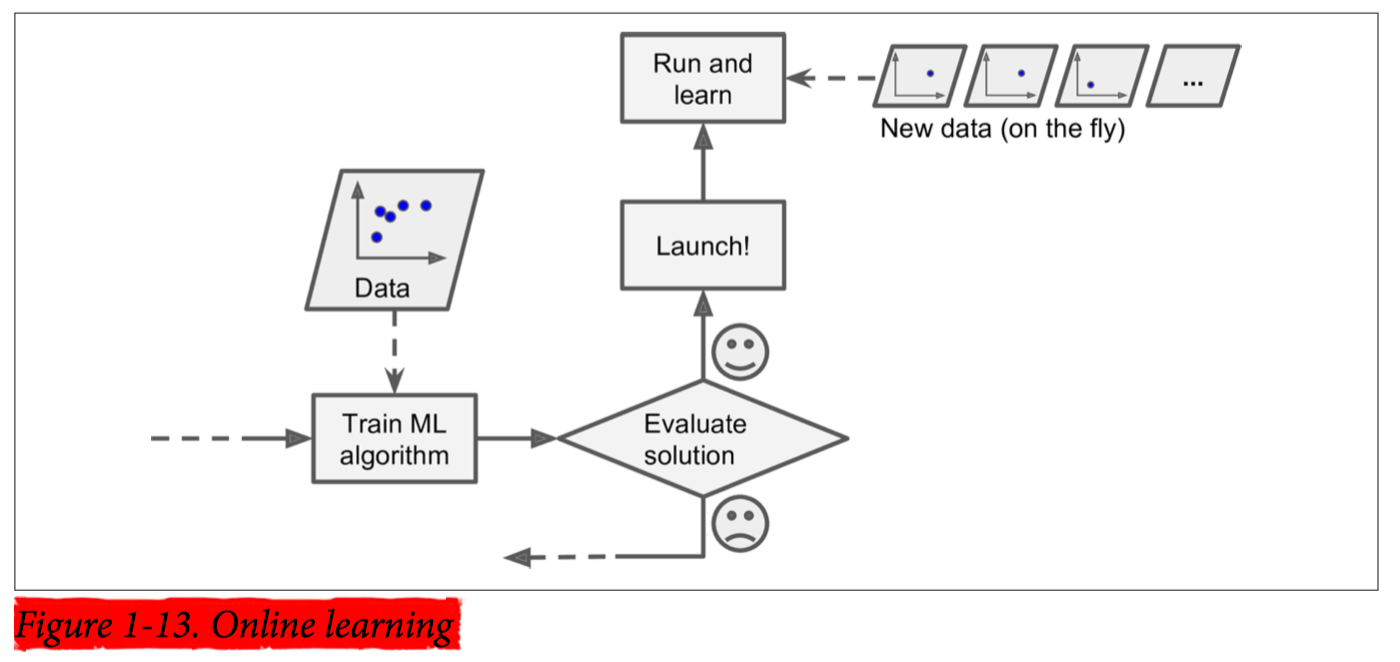

Online learning is great for systems that receive data as a continuous flow (e.g., stock prices) and need to adapt to change rapidly or autonomously.

Online learning algorithms can also be used to train systems on huge datasets that cannot fit in one machine’s main memory (this is called out-of-core learning). The algorithm loads part of the data, runs a training step on that data, and repeats the process until it has run on all of the data (see `Figure 1-14`).
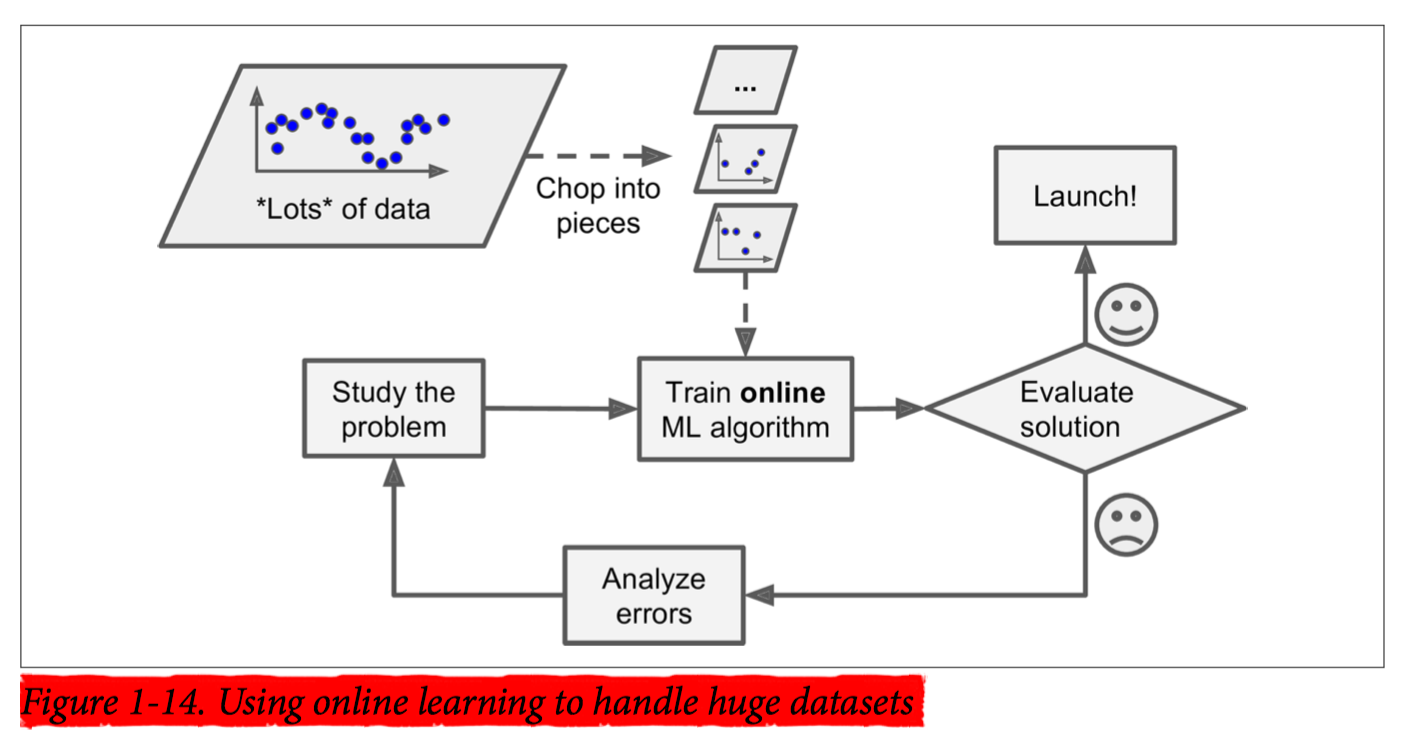

> This whole process is usually done offline (i.e., not on the live system), so online learning can be a confusing name. Think of it as incremental learning.

One important parameter of online learning systems is how fast they should adapt to changing data: this is called the `learning rate`. If you set a high learning rate, then your system will rapidly adapt to new data, but it will also tend to quickly forget the old data (you don’t want a spam filter to flag only the latest kinds of spam it was shown). Conversely, if you set a low learning rate, the system will have more inertia; that is, it will learn more slowly, but it will also be less sensitive to noise in the new data or to sequences of nonrepresentative data points.

A big challenge with online learning is that if bad data is fed to the system, the system’s performance will gradually decline. If we are talking about a live system, your clients will notice. For example, bad data could come from a malfunctioning sensor on a robot, or from someone spamming a search engine to try to rank high in search results. To reduce this risk, you need to monitor your system closely and promptly switch learning off (and possibly revert to a previously working state) if you detect a drop in performance. You may also want to monitor the input data and react to abnormal data.

### 1.3.3 Instance-Based Versus Model-Based Learning
One more way to categorize Machine Learning systems is by how they generalize. There are two main approaches to generalization: instance-based learning and model-based learning.

#### 1.3.3.1 Instance-based learning
Possibly the most trivial form of learning is simply to learn by heart(by heart--凭记忆). Your spam filter could be programmed to also flag emails that are very similar to known spam emails. This requires a measure of similarity between two emails. A (very basic) similarity measure between two emails could be to count the number of words they have in common. The system would flag an email as spam if it has many words in common with a known spam email.

This is called `instance-based learning`: the system learns the examples by heart, then generalizes to new cases using a similarity measure (`Figure 1-15`).
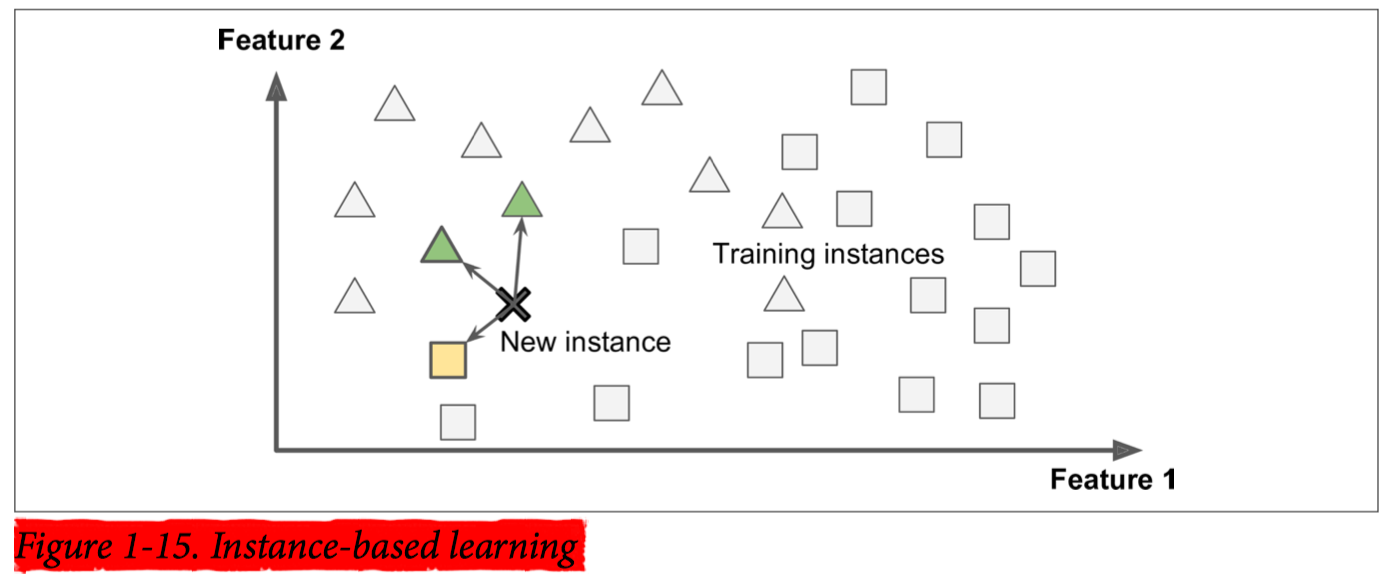

#### 1.3.3.2 Model-based learning
Another way to generalize from a set of examples is to build a model of these examples, then use that model to make predictions. This is called `model-based learning` (`Figure 1-16`):
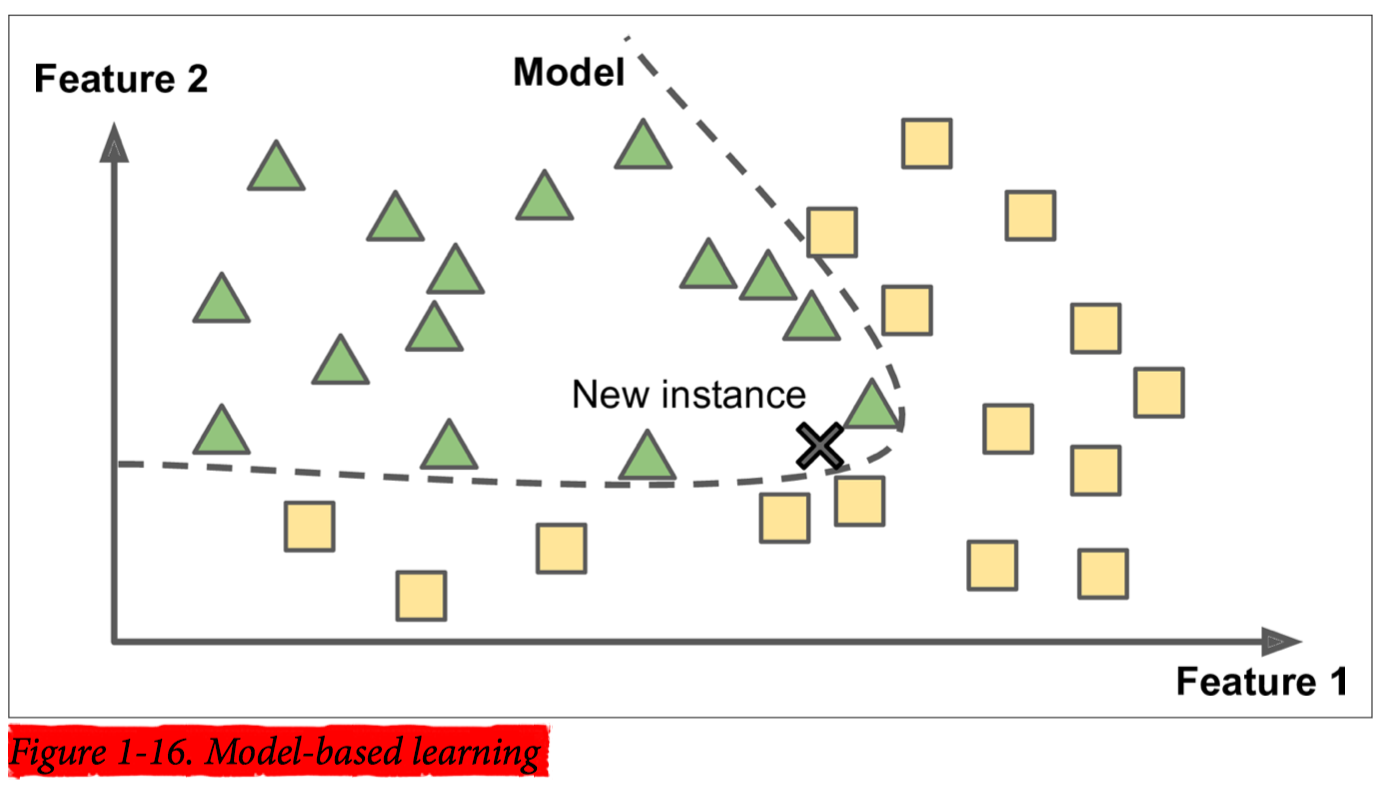

For example, suppose you want to know if money makes people happy, so you download the Better Life Index data from the `OECD’s website` as well as stats about GDP per capita from the `IMF’s website`. Then you join the tables and sort by GDP per capita. `Table 1-1` shows an excerpt of what you get:
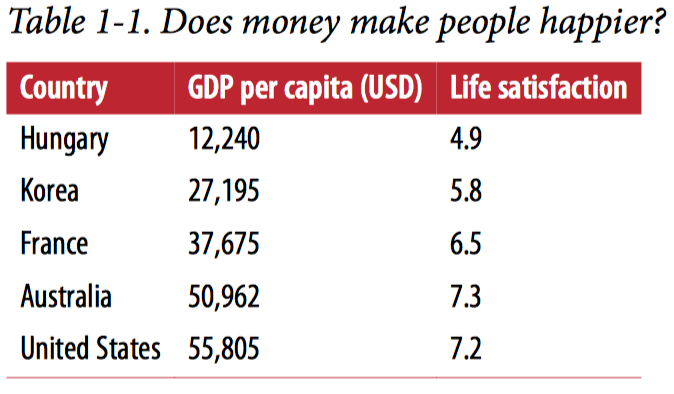

Let’s plot the data for a few random countries (`Figure 1-17`):
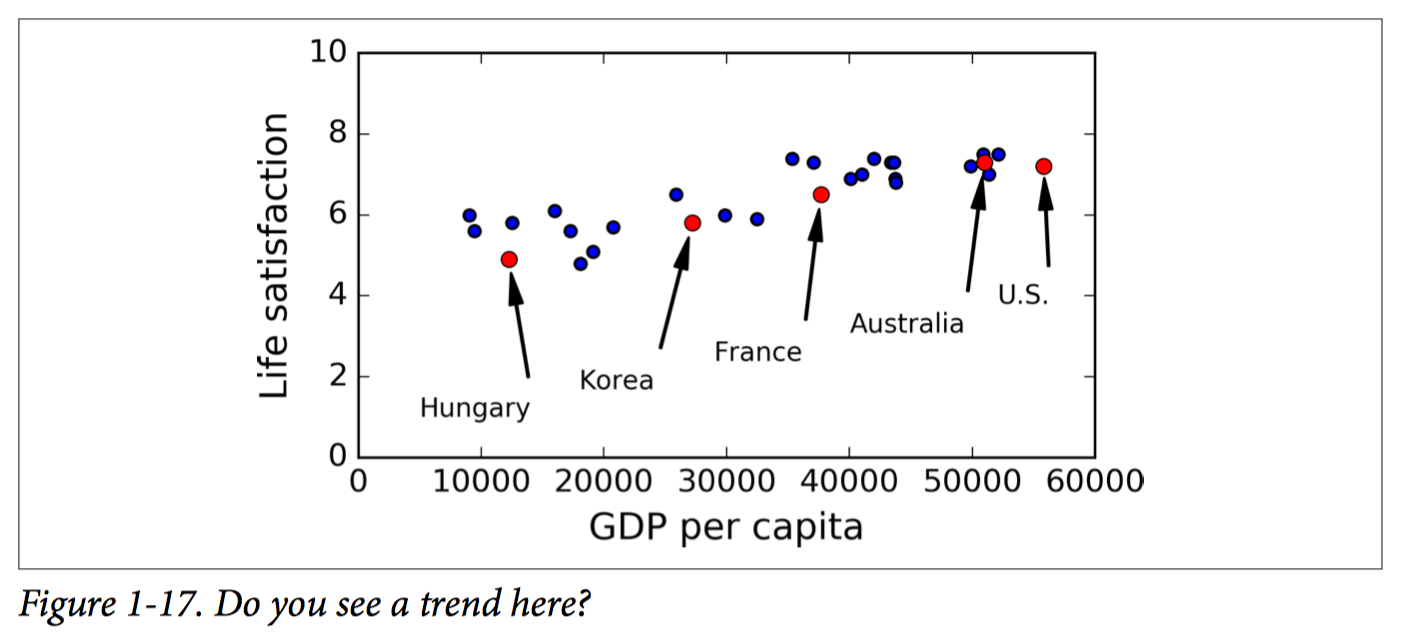

There does seem to be a trend here! Although the data is noisy, it looks like life satisfaction goes up more or less linearly as the country’s GDP per capita increases. So you decide to model life satisfaction as a linear function of GDP per capita. This step is called model selection: you selected a linear model of life satisfaction with just one attribute, GDP per capita:
- $life\_satisfaction = \theta_0 + \theta_1 * GDP\_per\_capita$

This model has two model parameters, by tweaking these parameters, you can make your model represent any linear function, as shown in `Figure 1-18`:
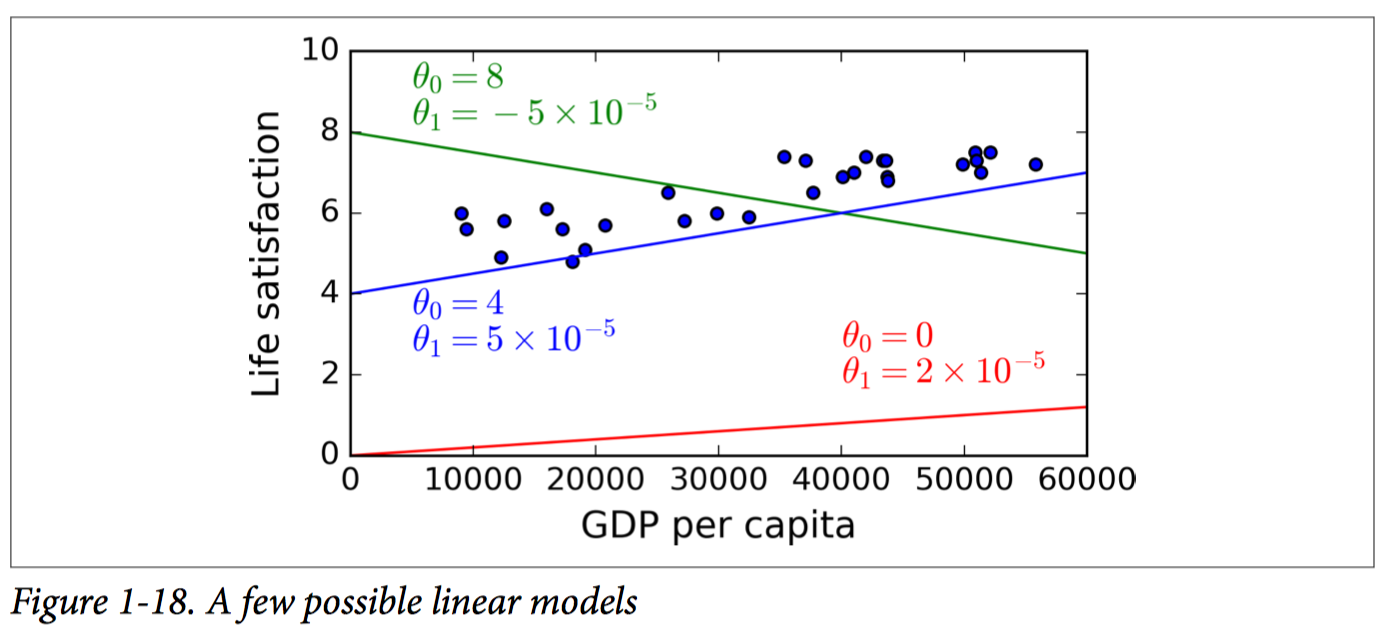

Before you can use your model, you need to define the parameter values $\theta_0$ and $\theta_1$. How can you know which values will make your model perform best? To answer this question, you need to specify a performance measure. You can either define a utility function (or fitness function) that measures how good your model is, or you can define a cost function that measures how bad it is. For linear regression problems, people typically use a cost function that measures the distance between the linear model’s predictions and the training examples; the objective is to minimize this distance.

This is where the Linear Regression algorithm comes in: you feed it your training examples and it finds the parameters that make the linear model fit best to your data. This is called training the model. In our case the algorithm finds that the optimal parameter values are $\theta_0 = 4.85$ and $\theta_1 = 4.91*10^{-5}$.

Now the model fits the training data as closely as possible (for a linear model), as you can see in Figure 1-19:
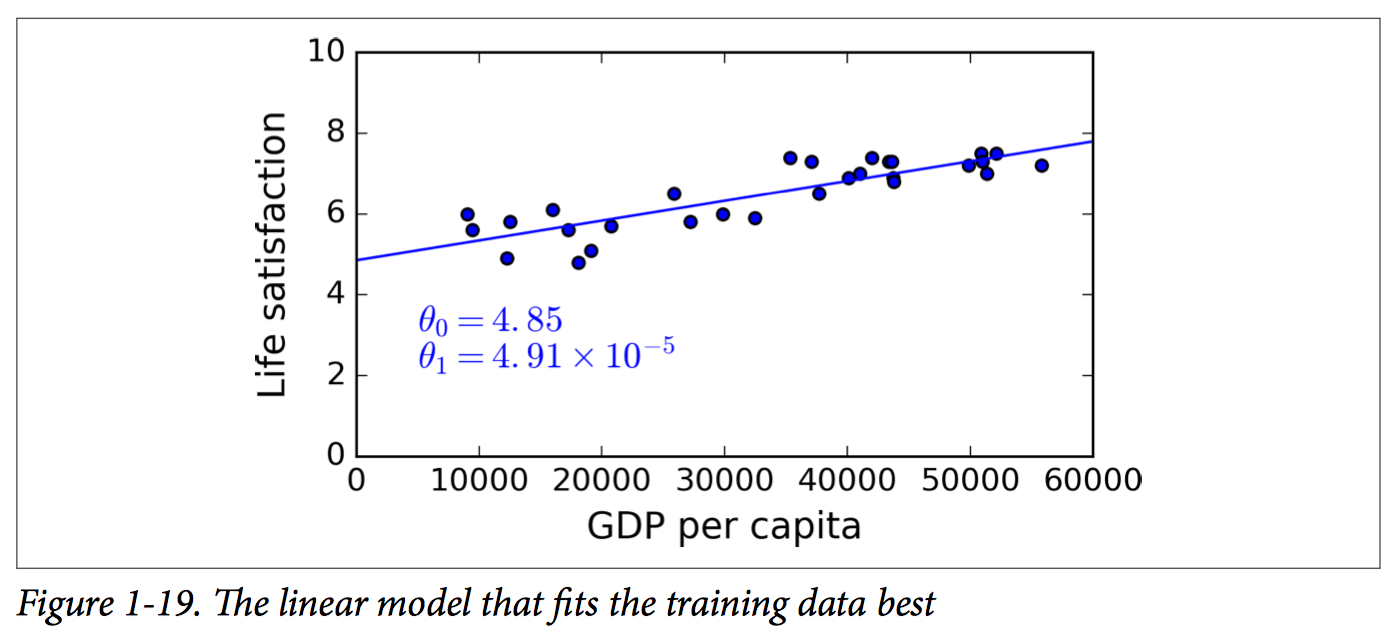

You are finally ready to run the model to make predictions. For example, say you want to know how happy Cypriots are, and the OECD data does not have the answer. Fortunately, you can use your model to make a good prediction: you look up Cyprus’s GDP per capita, find `$22587`, and then apply your model and find that life satisfaction is likely to be somewhere around $4.85+22587*4.91*10^{-5} = 5.96$.

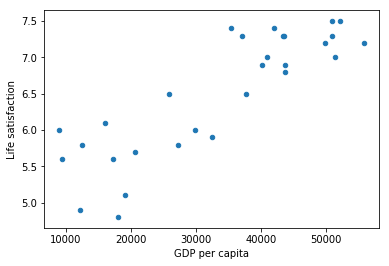

[[ 5.96242338]]


In [2]:
def prepare_country_stats(oecd_bli: object, gdp_per_capita: object) -> object:
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Load the data 
oecd_bli = pd.read_csv("datasets/oecd_bli_2015.csv", thousands=',') 
gdp_per_capita = pd.read_csv("datasets/gdp_per_capita.csv", thousands=',', 
                             delimiter='\t', encoding='latin1', na_values="n/a")

# Prepare the data 
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) 
X = np.c_[country_stats["GDP per capita"]] 
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data 
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction') 
plt.show()

# Select a linear model 
clf = sklearn.linear_model.LinearRegression()

# Train the model 
clf.fit(X, y)

# Make a prediction for Cyprus 
X_new = [[22587]] # Cyprus' GDP per capita 
print(clf.predict(X_new)) # outputs [[ 5.96242338]]

> If you had used an instance-based learning algorithm instead, you would have found that Slovenia has the closest GDP per capita to that of Cyprus, and since the OECD data tells us that Slovenians’ life satisfaction is 5.7, you would have predicted a life satisfaction of 5.7 for Cyprus. If you zoom out a bit and look at the two next closest countries, you will find Portugal and Spain with life satisfactions of 5.1 and 6.5, respectively. Averaging these three values, you get 5.77, which is pretty close to your model-based prediction. This simple algorithm is called kNN regression.

Replacing the Linear Regression model with kNN regression in the previous code is as simple as replacing this line:
```python
clf = sklearn.linear_model.LinearRegression()
```

with this one:
```python
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```

In [3]:
# Select a kNN model 
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model 
clf.fit(X, y)

# Make a prediction for Cyprus 
X_new = [[22587]] # Cyprus' GDP per capita 
print(clf.predict(X_new)) # outputs [[ 5.96242338]]

[[ 5.76666667]]


## 1.4 Main Challenges of Machine Learning
In short, since your main task is to select a learning algorithm and train it on some data, the two things that can go wrong are “bad algorithm” and “bad data.” 

### 1.4.1 Insufficient Quantity of Training Data
Machine Learning takes a lot of data to work properly. Even for very simple problems you typically need thousands of examples, and for complex problems such as image or speech recognition you may need millions of examples.

> **The Unreasonable Effectiveness of Data**
>
> In a famous paper published in 2001, Microsoft researchers Michele Banko and Eric Brill showed that very different Machine Learning algorithms, including fairly simple ones, performed almost identically well on a complex problem of natural language disambiguation once they were given enough data (as you can see in Figure 1-20).
> 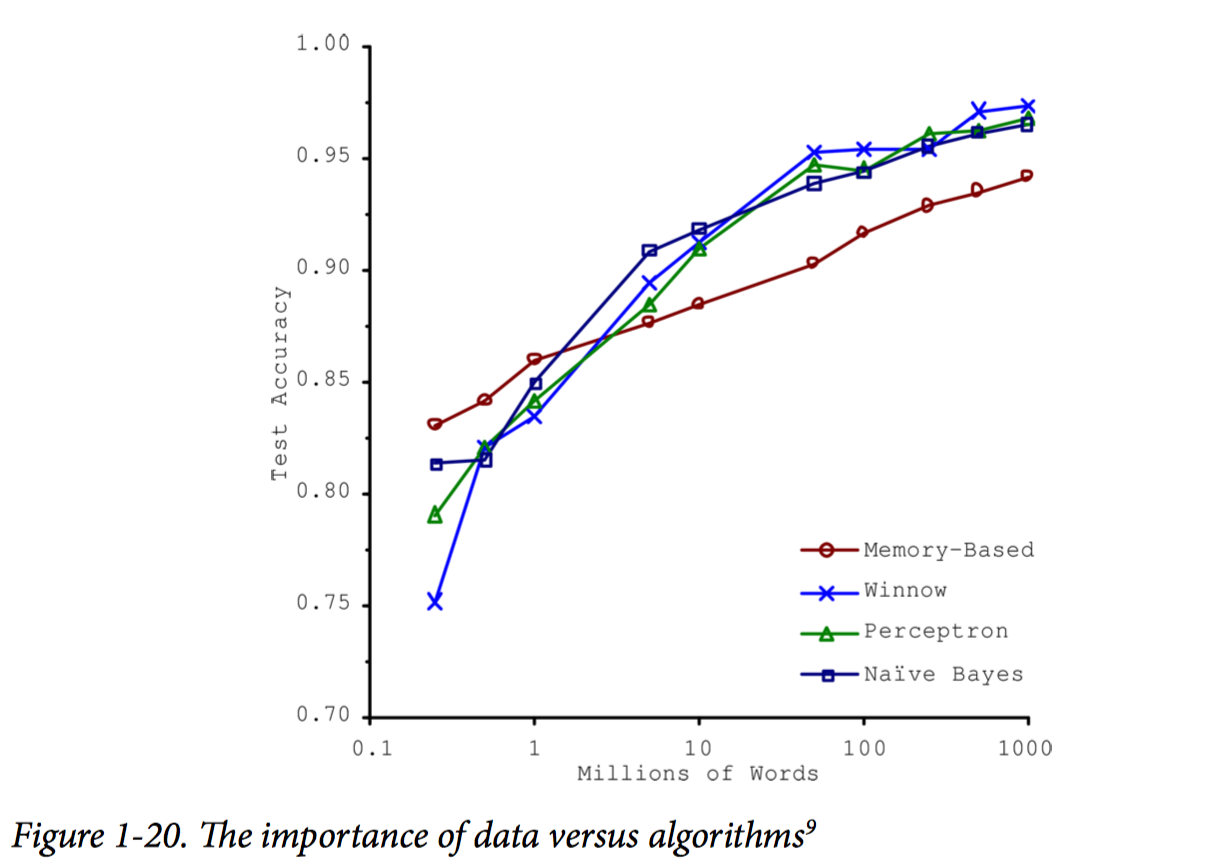
> As the authors put it: “these results suggest that we may want to reconsider the tradeoff between spending time and money on algorithm development versus spending it on corpus development.”
> 
> The idea that data matters more than algorithms for complex problems was further popularized by Peter Norvig et al. in a paper titled “The Unreasonable Effectiveness of Data” published in 2009. 10 It should be noted, however, that small- and medium-sized datasets are still very common, and it is not always easy or cheap to get extra training data, so don’t abandon algorithms just yet.

### 1.4.2 Nonrepresentative Training Data
In order to generalize well, it is crucial that your training data be representative of the new cases you want to generalize to. This is true whether you use instance-based learning or model-based learning.

For example, the set of countries we used earlier for training the linear model was not perfectly representative; a few countries were missing. `Figure 1-21` shows what the data looks like when you add the missing countries:
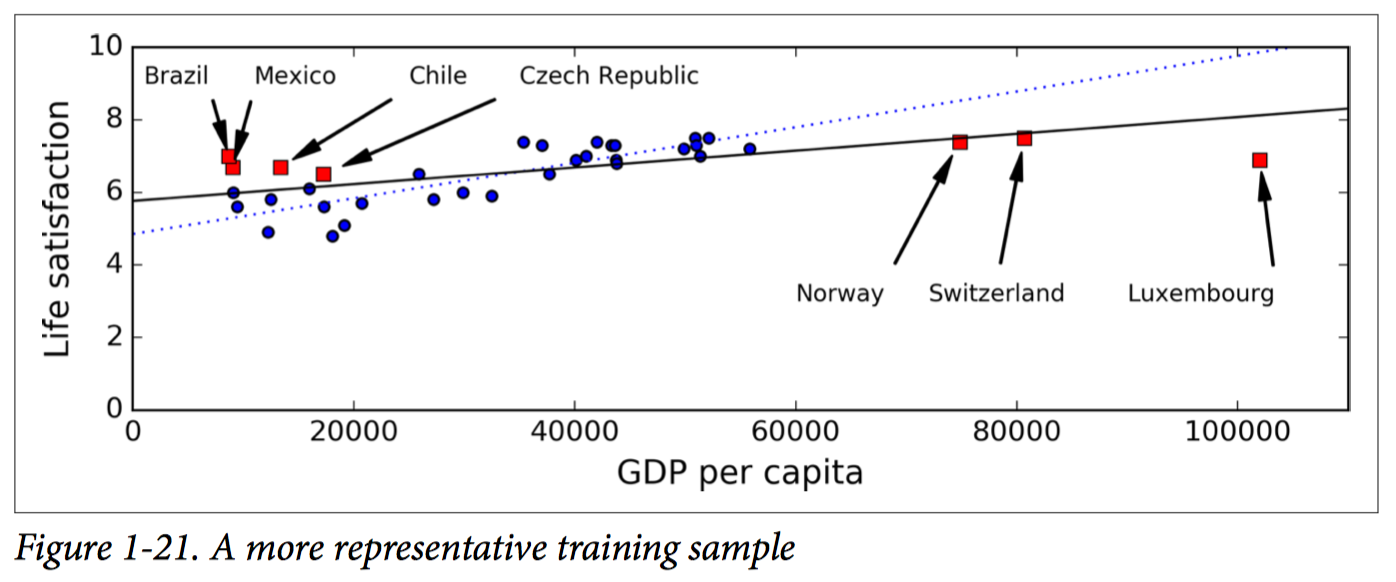

If you train a linear model on this data, you get the solid line, while the old model is represented by the dotted line. As you can see, not only does adding a few missing countries significantly alter the model, but it makes it clear that such a simple linear model is probably never going to work well. It seems that very rich countries are not happier than moderately rich countries (in fact they seem unhappier), and conversely some poor countries seem happier than many rich countries.

It is crucial to use a training set that is representative of the cases you want to generalize to. This is often harder than it sounds: if the sample is too small, you will have `sampling noise`, but even very large samples can be nonrepresentative if the sampling method is flawed. This is called `sampling bias`.

### 1.4.3 Poor-Quality Data
Obviously, if your training data is full of errors, outliers, and noise, it will make it harder for the system to detect the underlying patterns, so your system is less likely to perform well. ***It is often well worth the effort to spend time cleaning up your training data. The truth is, most data scientists spend a significant part of their time doing just that***. For example:
- If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually.
- If some instances are missing a few features, you must decide whether you want to ignore this attribute altogether, ignore these instances, fill in the missing values, or train one model with the feature and one model without it, and so on.

### 1.4.4 Irrelevant Features
***As the saying goes: garbage in, garbage out***. Your system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant ones. A critical part of the success of a Machine Learning project is coming up with a good set of features to train on. This process, called `feature engineering`, involves:
- **Feature selection**: selecting the most useful features to train on among existing features.
- **Feature extraction**: combining existing features to produce a more useful one.
- Creating new features by gathering new data.

Now that we have looked at many examples of bad data, let’s look at a couple of examples of bad algorithms.

### 1.4.5 Overfitting the Training Data
Overfitting means the model performs well on the training data, but it does not generalize well.

`Figure 1-22` shows an example of a high-degree polynomial life satisfaction model that strongly overfits the training data. Even though it performs much better on the training data than the simple linear model, would you really trust its predictions?
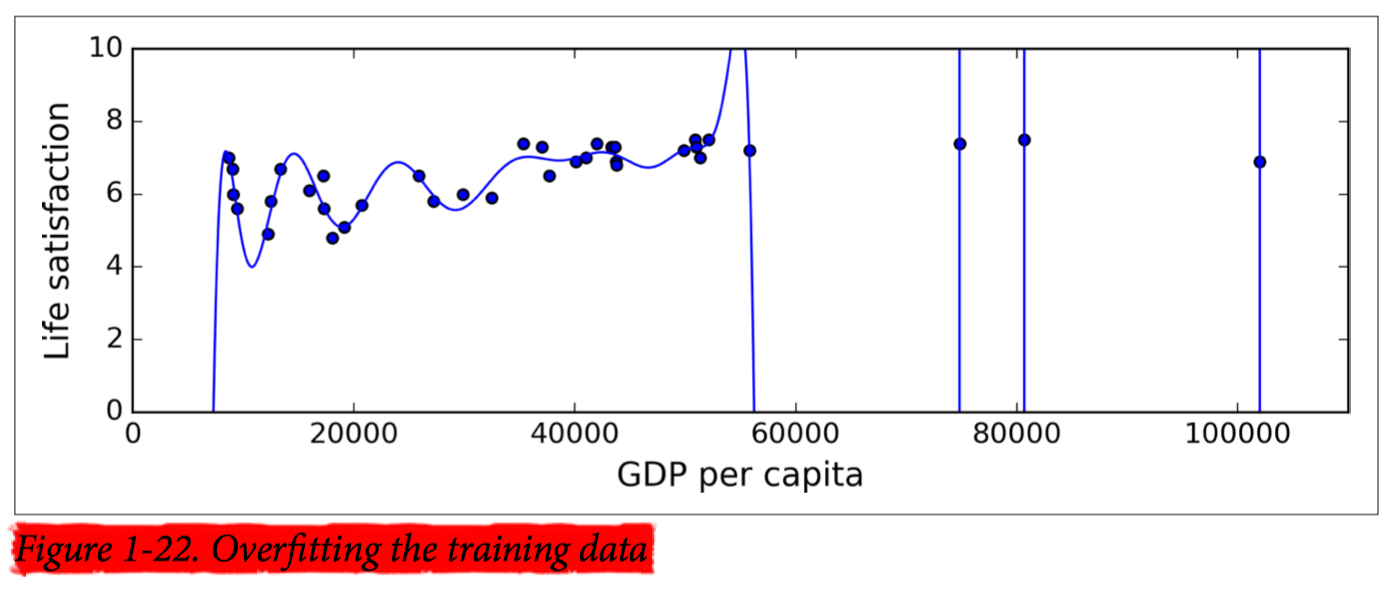

Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:
- To simplify the model by selecting one with fewer parameters, by reducing the number of attributes in the training data or by constraining the model
- To gather more training data
- To reduce the noise in the training data (e.g., fix data errors and remove outliers)

Constraining a model to make it simpler and reduce the risk of overfitting is called regularization.

For example, the linear model we defined earlier has two parameters, $\theta_0$ and $\theta_1$. This gives the learning algorithm two degrees of freedom to adapt the model to the training data. If we forced $\theta_1 = 0$, the algorithm would have only one degree of freedom and would have a much harder time fitting the data properly: all it could do is move the line up or down to get as close as possible to the training instances, so it would end up around the mean. A very simple model indeed! If we allow the algorithm to modify $\theta_1$ but we force it to keep it small, then the learning algorithm will effectively have somewhere in between one and two degrees of freedom. It will produce a simpler model than with two degrees of freedom, but more complex than with just one. You want to find the right balance between fitting the data perfectly and keeping the model simple enough to ensure that it will generalize well.

`Figure 1-23` shows three models: 
- the dotted line represents the original model that was trained with a few countries missing
- the dashed line is our second model trained with all countries
- the solid line is a linear model trained with the same data as the first model but with a regularization constraint

You can see that regularization forced the model to have a smaller slope, which fits a bit less the training data that the model was trained on, but actually allows it to generalize better to new examples.
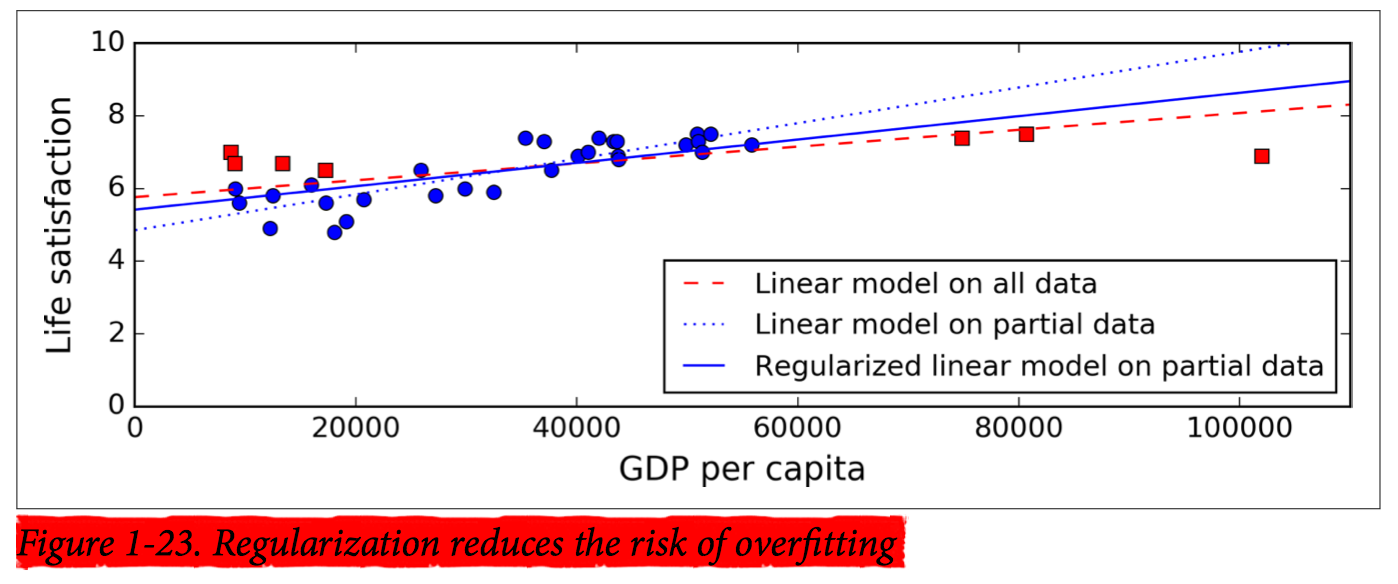

***The amount of regularization to apply during learning can be controlled by a `hyperparameter`. A `hyperparameter` is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. If you set the regularization hyperparameter to a very large value, you will get an almost flat model (a slope close to zero); the learning algorithm will almost certainly not overfit the training data, but it will be less likely to find a good solution. Tuning hyperparameters is an important part of building a Machine Learning system***.

### 1.4.6 Underfitting the Training Data
Underfitting is the opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data. For example, a linear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.

The main options to fix this problem are:
- Selecting a more powerful model, with more parameters
- Feeding better features to the learning algorithm (feature engineering)
- Reducing the constraints on the model (e.g., reducing the regularization hyperparameter)

### 1.4.7 Stepping Back
By now you already know a lot about Machine Learning. However, we went through so many concepts that you may be feeling a little lost, so let’s step back and look at the big picture:
- Machine Learning is about making machines get better at some task by learning from data, instead of having to explicitly code rules.
- There are many different types of ML systems: supervised or not, batch or online, instance-based or model-based, and so on.
- In a ML project you gather data in a training set, and you feed the training set to a learning algorithm. If the algorithm is model-based it tunes some parameters to fit the model to the training set (i.e., to make good predictions on the training set itself), and then hopefully it will be able to make good predictions on new cases as well. If the algorithm is instance-based, it just learns the examples by heart and uses a similarity measure to generalize to new instances.
- The system will not perform well if your training set is too small, or if the data is not representative, noisy, or polluted with irrelevant features (garbage in, garbage out). Lastly, your model needs to be neither too simple (in which case it will underfit) nor too complex (in which case it will overfit).

## 1.5 Testing and Validating
The only way to know how well a model will generalize to new cases is to actually try it out on new cases. One way to do that is to put your model in production and monitor how well it performs. This works well, but if your model is horribly bad, your users will complain—not the best idea.

A better option is to split your data into two sets: the `training set` and the `test set`. As these names imply, you train your model using the training set, and you test it using the test set. The error rate on new cases is called the `generalization error` (or out-of-sample error), and by evaluating your model on the test set, you get an estimation of this error. This value tells you how well your model will perform on instances it has never seen before.

If the training error is low but the generalization error is high, it means that your model is overfitting the training data.

So evaluating a model is simple enough: just use a test set. Now suppose you are hesitating between two models: how can you decide? One option is to train both and compare how well they generalize using the test set.

Now suppose that the linear model generalizes better, but you want to apply some regularization to avoid overfitting. The question is: how do you choose the value of the regularization hyperparameter? One option is to train 100 different models using 100 different values for this hyperparameter. Suppose you find the best hyperparameter value that produces a model with the lowest generalization error, say just 5% error.

So you launch this model into production, but unfortunately it does not perform as well as expected and produces 15% errors. What just happened?

The problem is that you measured the generalization error multiple times on the test set, and you adapted the model and hyperparameters to produce the best model for that set. This means that the model is unlikely to perform as well on new data.

A common solution to this problem is to have a second holdout set called the `validation set`. You train multiple models with various hyperparameters using the training set, you select the model and hyperparameters that perform best on the validation set, and when you’re happy with your model you run a single final test against the test set to get an estimate of the generalization error.

To avoid “wasting” too much training data in validation sets, a common technique is to use `cross-validation`: the training set is split into complementary subsets, and each model is trained against a different combination of these subsets and validated against the remaining parts. Once the model type and hyperparameters have been selected, a final model is trained using these hyperparameters on the full training set, and the generalized error is measured on the test set.

> **No Free Lunch Theorem**
> 
> A model is a simplified version of the observations. The simplifications are meant to discard the superfluous details that are unlikely to generalize to new instances. However, to decide what data to discard and what data to keep, you must make assumptions. For example, a linear model makes the assumption that the data is fundamentally linear and that the distance between the instances and the straight line is just noise, which can safely be ignored.
> 
> In a famous 1996 paper("The Lack of A Priori Distinctions Between Learning Algorithms”), David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the No Free Lunch (NFL) theorem. For some datasets the best model is a linear model, while for other datasets it is a neural network. There is no model that is a priori guaranteed to work better (hence the name of the theorem). The only way to know for sure which model is best is to evaluate them all. Since this is not possible, in practice you make some reasonable assumptions about the data and you evaluate only a few reasonable models. For example, for simple tasks you may evaluate linear models with various levels of regularization, and for a complex problem you may evaluate various neural networks.